## Implementation Missing Value Handling,Enconding,Cosine Similarity,Outlier

#### ENCONDING

##### Encoding is the process of converting categorical (non-numeric/text) data into numeric values that machine learning algorithms can understand and process.

In [5]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor'],
    'City': ['Mumbai', 'Delhi', 'Delhi', 'Pune', 'Mumbai']
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print("\n")


Original DataFrame:
   Gender    Education    City
0    Male  High School  Mumbai
1  Female     Bachelor   Delhi
2  Female       Master   Delhi
3    Male          PhD    Pune
4    Male     Bachelor  Mumbai




#### 🔹 Types of Encoding

#### 1️. Label Encoding
Each category is replaced by an unique number.


In [6]:
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])

print("After Label Encoding:")
print(df[['Gender', 'Gender_encoded']])
print("\n")



After Label Encoding:
   Gender  Gender_encoded
0    Male               1
1  Female               0
2  Female               0
3    Male               1
4    Male               1




In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])


print(df)




   Gender    Education    City  Gender_encoded
0    Male  High School  Mumbai               1
1  Female     Bachelor   Delhi               0
2  Female       Master   Delhi               0
3    Male          PhD    Pune               1
4    Male     Bachelor  Mumbai               1


#### 2️. One-Hot Encoding

Creates a new binary column (0/1) for each category — no false order.

In [8]:

ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(df[['City']])
df_ohe = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['City']))

df_onehot = pd.concat([df, df_ohe], axis=1)
print("After One-Hot Encoding:")
print(df_onehot)
print("\n")


After One-Hot Encoding:
   Gender    Education    City  Gender_encoded  City_Delhi  City_Mumbai  \
0    Male  High School  Mumbai               1         0.0          1.0   
1  Female     Bachelor   Delhi               0         1.0          0.0   
2  Female       Master   Delhi               0         1.0          0.0   
3    Male          PhD    Pune               1         0.0          0.0   
4    Male     Bachelor  Mumbai               1         0.0          1.0   

   City_Pune  
0        0.0  
1        0.0  
2        0.0  
3        1.0  
4        0.0  




#### 3️. Ordinal Encoding

Used when the categories have a natural order (rank).

In [9]:
order = [['High School', 'Bachelor', 'Master', 'PhD']]
oe = OrdinalEncoder(categories=order)
df['Education_encoded'] = oe.fit_transform(df[['Education']])

print("After Ordinal Encoding:")
print(df[['Education', 'Education_encoded']])
print("\n")


After Ordinal Encoding:
     Education  Education_encoded
0  High School                0.0
1     Bachelor                1.0
2       Master                2.0
3          PhD                3.0
4     Bachelor                1.0




#### 4️. Target / Mean Encoding (Advanced)
Replaces each category with the mean value of the target variable for that category.


In [10]:
df['Purchased'] = [1, 0, 1, 0, 1]
target_means = df.groupby('City')['Purchased'].mean()
df['City_encoded'] = df['City'].map(target_means)

print("After Target/Mean Encoding:")
print(df[['City', 'City_encoded']])


After Target/Mean Encoding:
     City  City_encoded
0  Mumbai           1.0
1   Delhi           0.5
2   Delhi           0.5
3    Pune           0.0
4  Mumbai           1.0


#### MISSING VALUES HANDING
Missing value handling is the process of identifying, cleaning, and treating incomplete data so the ML model doesn’t give garbage output.

#### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np



#### 2. Create Example DataFrame with Missing Values

In [2]:
data = {
    'Age': [25, 30, np.nan, 28, np.nan],
    'Salary': [50000, np.nan, 60000, 52000, 58000],
    'City': ['Pune', 'Delhi', np.nan, 'Mumbai', 'Pune']
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)



Original DataFrame:
     Age   Salary    City
0  25.0  50000.0    Pune
1  30.0      NaN   Delhi
2   NaN  60000.0     NaN
3  28.0  52000.0  Mumbai
4   NaN  58000.0    Pune


#### 3. Identify Missing Values

In [3]:
print("\nMissing Values Count:\n", df.isnull().sum())



Missing Values Count:
 Age       2
Salary    1
City      1
dtype: int64


#### 4. Handle Missing Values

A. Drop Missing Values

Use this only if the missing data is small and unimportant.

In [7]:
df_drop = df.dropna()
print("\nAfter Dropping Missing Values:\n", df_drop)



After Dropping Missing Values:
          Age   Salary    City
0  25.000000  50000.0    Pune
1  30.000000  55000.0   Delhi
3  28.000000  52000.0  Mumbai
4  27.666667  58000.0    Pune


#### Types of Missing Value Handling

1.Deletion Methods

You remove missing data.

2️.Imputation Methods

You fill (replace) missing values instead of deleting them.


3.Advanced / Model-Based Methods

a) KNN Imputation
b) Regression Imputation
c)multiple Imputation
d)Indterpolation

#### Cosine Similarity 

Value range:

1 → Identical direction (perfectly similar)

0 → Orthogonal (no similarity)

-1 → Opposite direction (completely dissimilar)

#### Cosine similarity measures how close two vectors point in the same direction, NOT how close they are in magnitude

angle between two vectors is small → similar

angle between two vectors is large → not similar

#### 1. Using sklearn
This is the cleanest and most common way.​

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example vectors
A = np.array([[1, 2, 3]])
B = np.array([[4, 5, 6]])

# Compute Cosine Similarity
similarity = cosine_similarity(A, B)
print("Cosine Similarity:", similarity)


Cosine Similarity: [[0.97463185]]


#### 2. Manual Implementation (Formula Method)
Formula:

               Cosine Similarity=A.B ∣∣A∣∣×∣∣B∣∣

In [10]:
import numpy as np

A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

cos_sim = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))
print("Cosine Similarity:", cos_sim)


Cosine Similarity: 0.9746318461970762


#### 3.Cosine Similarity for Multiple Vectors

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Each row = one data point
X = np.array([
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 0]
])

# Pairwise cosine similarity matrix
cos_matrix = cosine_similarity(X)
print(pd.DataFrame(cos_matrix))


     0    1    2
0  1.0  0.5  0.5
1  0.5  1.0  0.5
2  0.5  0.5  1.0


#### 4.Cosine Similarity in Text (TF-IDF Example)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

texts = [
    "Machine learning is powerful",
    "Deep learning is a subset of machine learning",
    "I love pizza"
]

# Convert text to TF-IDF vectors
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)

# Compute similarity between sentences
similarity = cosine_similarity(tfidf_matrix)
print(similarity)



[[1.         0.54995607 0.        ]
 [0.54995607 1.         0.        ]
 [0.         0.         1.        ]]


#### Outlier
An outlier is a data point that doesn’t behave like the rest of the dataset.
It’s an oddball. Something that doesn’t fit the pattern.

Example:
In [10, 12, 11, 9, 10, 95] → 95 is an outlier.

#### 1.Import Required Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 2.Create Example Data

In [14]:
data = {'Age': [22, 23, 24, 25, 120, 26, 24, 23, 22, 150]}
df = pd.DataFrame(data)
print(df)


   Age
0   22
1   23
2   24
3   25
4  120
5   26
6   24
7   23
8   22
9  150


#### 3.Visualize Outliers
Before removing anything, always see the spread.

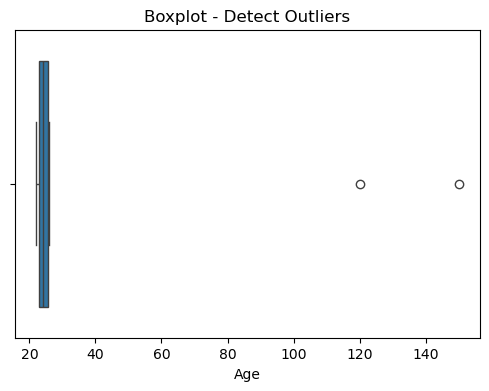

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot - Detect Outliers")
plt.show()


#### 4.Detect Outliers (IQR Method)

Most common and clean method in ML preprocessing.

In [16]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Identify outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("\nDetected Outliers:\n", outliers)


Lower Bound: 18.875
Upper Bound: 29.875

Detected Outliers:
    Age
4  120
9  150


#### 5.Remove Outlier

In [17]:
df_clean = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
print("\nAfter Removing Outliers:\n", df_clean)



After Removing Outliers:
    Age
0   22
1   23
2   24
3   25
5   26
6   24
7   23
8   22


#### 6.Alternative: Z-Score Method
Use when data is normally distributed.

In [18]:
from scipy import stats

z = np.abs(stats.zscore(df['Age']))
threshold = 3
df_z = df[z < threshold]

print("\nAfter Removing Outliers using Z-Score:\n", df_z)



After Removing Outliers using Z-Score:
    Age
0   22
1   23
2   24
3   25
4  120
5   26
6   24
7   23
8   22
9  150


#### 7.Visualize Clean Data

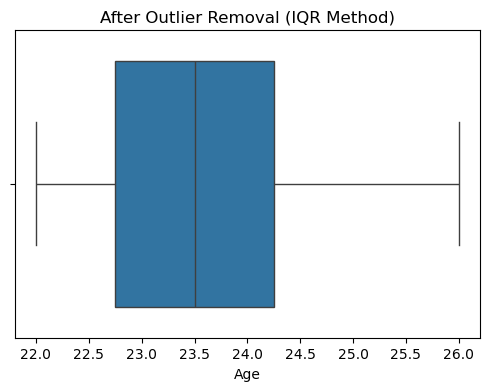

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['Age'])
plt.title("After Outlier Removal (IQR Method)")
plt.show()


#### 8.Handling Instead of Removing 
Sometimes you shouldn’t delete outliers — you cap them at a threshold.

In [20]:
df_capped = df.copy()
df_capped['Age'] = np.where(df['Age'] > upper_bound, upper_bound,
                     np.where(df['Age'] < lower_bound, lower_bound, df['Age']))
print("\nAfter Capping Outliers:\n", df_capped)



After Capping Outliers:
       Age
0  22.000
1  23.000
2  24.000
3  25.000
4  29.875
5  26.000
6  24.000
7  23.000
8  22.000
9  29.875
